# VGG

In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

data_dir = f"{os.getcwd()}/Celebrity Faces Dataset"
img_width, img_height = 224, 224
batch_size = 32

# Data preprocessing
# Link where I figured out how to conduct a train-test split for each celebrity's folder contining their facial images
# https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.25)

train_generator = datagen.flow_from_directory(
    data_dir, # train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training')

test_generator = datagen.flow_from_directory(
    data_dir, # test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation')

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

for layer in base_model.layers:
    layer.trainable = False

model = Sequential([base_model,
                    Flatten(),
                    Dense(256, activation='relu'),
                    Dense(17, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 1350 images belonging to 17 classes.
Found 450 images belonging to 17 classes.


In [2]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/5
42/42 [==============================] - 178s 4s/step - loss: 3.7347 - accuracy: 0.1639 - val_loss: 2.3501 - val_accuracy: 0.2902
Epoch 2/5
42/42 [==============================] - 182s 4s/step - loss: 1.7619 - accuracy: 0.4879 - val_loss: 2.0784 - val_accuracy: 0.3705
Epoch 3/5
42/42 [==============================] - 178s 4s/step - loss: 1.0920 - accuracy: 0.7155 - val_loss: 1.4702 - val_accuracy: 0.5156
Epoch 4/5
42/42 [==============================] - 185s 4s/step - loss: 0.5949 - accuracy: 0.8923 - val_loss: 1.2258 - val_accuracy: 0.6116
Epoch 5/5
42/42 [==============================] - 185s 4s/step - loss: 0.3193 - accuracy: 0.9750 - val_loss: 1.1816 - val_accuracy: 0.6339


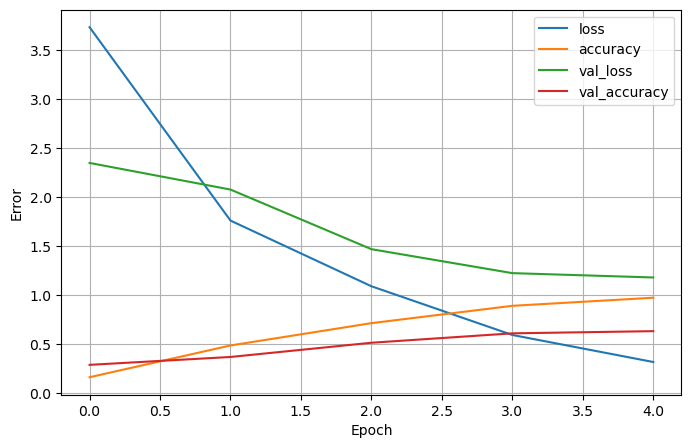

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()

In [4]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 48s 3s/step - loss: 1.1803 - accuracy: 0.6356
Test Loss: 1.180310606956482
Test Accuracy: 0.6355555653572083


# Flat Augmentation with Some Combination Augmentation

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

model = Sequential([(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3))),
                     MaxPooling2D((2, 2)),
                     Conv2D(64, (3, 3), activation='relu'),
                     MaxPooling2D((2, 2)),
                     Conv2D(128, (3, 3), activation='relu'),
                     MaxPooling2D((2, 2)),
                     Flatten(),
                     Dense(512, activation='relu'),
                     Dense(17, activation='softmax')])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=10,
    validation_data=test_generator,
    validation_steps=test_generator.samples // batch_size)

Epoch 1/10
42/42 [==============================] - 30s 714ms/step - loss: 3.1431 - accuracy: 0.0994 - val_loss: 2.7464 - val_accuracy: 0.1228
Epoch 2/10
42/42 [==============================] - 27s 637ms/step - loss: 2.5543 - accuracy: 0.1821 - val_loss: 2.3558 - val_accuracy: 0.2478
Epoch 3/10
42/42 [==============================] - 27s 632ms/step - loss: 1.8827 - accuracy: 0.4082 - val_loss: 2.4554 - val_accuracy: 0.2522
Epoch 4/10
42/42 [==============================] - 27s 653ms/step - loss: 0.9548 - accuracy: 0.7071 - val_loss: 2.6880 - val_accuracy: 0.2835
Epoch 5/10
42/42 [==============================] - 28s 658ms/step - loss: 0.3559 - accuracy: 0.8923 - val_loss: 4.1205 - val_accuracy: 0.2969
Epoch 6/10
42/42 [==============================] - 31s 748ms/step - loss: 0.0914 - accuracy: 0.9750 - val_loss: 4.9878 - val_accuracy: 0.2902
Epoch 7/10
42/42 [==============================] - 28s 664ms/step - loss: 0.0693 - accuracy: 0.9841 - val_loss: 5.9157 - val_accuracy: 0.2679

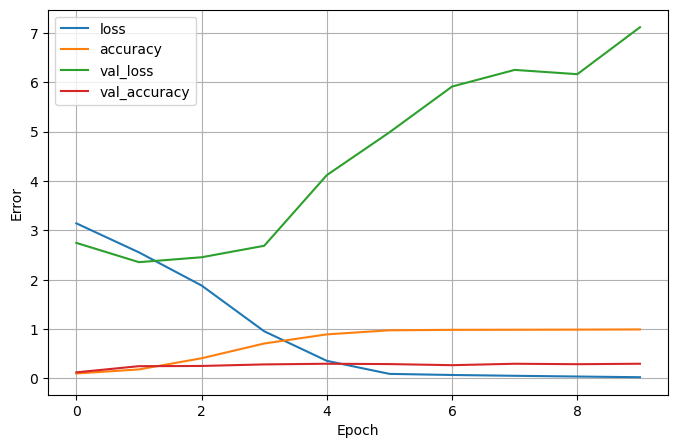

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.xlabel("Epoch")
plt.ylabel("Error")
plt.grid(True)
plt.show()

In [8]:
loss, accuracy = model.evaluate(test_generator)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

15/15 [==============================] - 3s 156ms/step - loss: 7.1260 - accuracy: 0.2978
Test Loss: 7.12604284286499
Test Accuracy: 0.29777777194976807
